In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import matplotlib.patches as mpatches

In [385]:
df = pd.read_json("dataV3.json")
df.shape

(7560, 29)

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano de Edição        3466 non-null   float64
 1   Colaborador          5077 non-null   object 
 2   Editora              5051 non-null   object 
 3   ISBN                 7228 non-null   object 
 4   Ano                  4997 non-null   float64
 5   Edição               4871 non-null   float64
 6   Origem               5075 non-null   object 
 7   Formato              5036 non-null   object 
 8   Encadernação         7196 non-null   object 
 9   Idioma               6291 non-null   object 
 10  País                 4974 non-null   object 
 11  Páginas              7053 non-null   float64
 12  Assunto              349 non-null    object 
 13  preço                7560 non-null   float64
 14  nome                 7560 non-null   object 
 15  categoria            7560 non-null   o

# Remove campos incomuns aos registros

In [387]:
campos_desnecessarios = ['Assunto','Idade','Tipo de Colaborador','EAN','Sinopse','Altura','Largura','Peso','Subtitulo','Grau./Nível','Série/Ano','Cor','Coleção']
df = df.drop(campos_desnecessarios,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano de Edição  3466 non-null   float64
 1   Colaborador    5077 non-null   object 
 2   Editora        5051 non-null   object 
 3   ISBN           7228 non-null   object 
 4   Ano            4997 non-null   float64
 5   Edição         4871 non-null   float64
 6   Origem         5075 non-null   object 
 7   Formato        5036 non-null   object 
 8   Encadernação   7196 non-null   object 
 9   Idioma         6291 non-null   object 
 10  País           4974 non-null   object 
 11  Páginas        7053 non-null   float64
 12  preço          7560 non-null   float64
 13  nome           7560 non-null   object 
 14  categoria      7560 non-null   object 
 15  Complemento    1494 non-null   object 
dtypes: float64(5), object(11)
memory usage: 945.1+ KB


## Será que o campo complemento impácta no preço?

In [388]:
df['Complemento'].value_counts()

NENHUM               1460
CD-AUDIO               17
LIVRO                   9
CD-ROM                  4
DVD-ROM                 2
BRINDE                  1
CARTÕES DE ACESSO       1
Name: Complemento, dtype: int64

<AxesSubplot:xlabel='Complemento', ylabel='preço'>

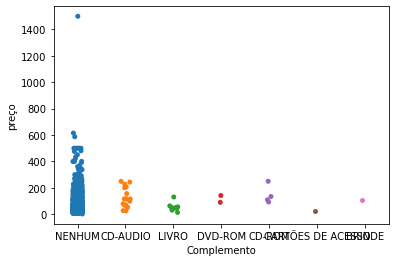

In [389]:
sns.stripplot(x="Complemento", y="preço", data=df)

### Complemento parece não importar muito para o preço

In [390]:
df = df.drop("Complemento",axis=1)

In [391]:
df.nunique()

Ano de Edição      45
Colaborador      4373
Editora           758
ISBN             7190
Ano                46
Edição             61
Origem              3
Formato             8
Encadernação       13
Idioma             11
País               11
Páginas           670
preço            1830
nome             7455
categoria          41
dtype: int64

# Verificando valores nulos para os campos

## Qual o percentual de nulos para cada campo?

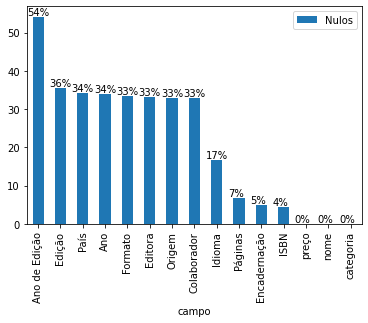

In [392]:
k = int(1 + 3.3 * math.log10(df.shape[0]))
total = df.shape[0]
data = pd.DataFrame({},columns=["campo","Não nulos","Nulos"])
for i,campo in enumerate(df) :
    qtd_null = df[df[campo].isna()].shape[0]
    row = [campo,100,(qtd_null*100)/total]
    data.loc[i] = row

data = data.sort_values(by="Nulos",ascending=False)

g = data.plot.bar(x='campo',y='Nulos')
for index,value in enumerate(data['Nulos']):
    plt.text(index-0.5,value+0.5,f"{value:.0f}%")
plt.show()

## Qual a diferença entre Ano e Ano de Edição

In [393]:
nao_nulos = df[(df['Ano de Edição'].notna()) & (df['Ano'].notna())].shape[0]
iguais = df[(df['Ano'] == df['Ano de Edição']) & (df['Ano de Edição'].notna()) & (df['Ano'].notna()) ][['Ano','Ano de Edição']]
print(f"{(iguais.shape[0] * 100)/nao_nulos:.2f}% dos campos não nulos de Ano e Ano de Edição são iguais")

98.81% dos campos não nulos de Ano e Ano de Edição são iguais


In [394]:
total = df.shape[0]
tem_ano_ed = df[(df['Ano de Edição'].notna()) & (df['Ano'].isna())]
tem_ano = df[(df['Ano'].notna()) & (df['Ano de Edição'].isna())]
nenhum = df[(df['Ano'].isna()) & (df['Ano de Edição'].isna())]
os_dois = df[(df['Ano'].notna()) & (df['Ano de Edição'].notna())]
print(f"{(tem_ano_ed.shape[0] * 100)/total:.2f}% casos possuem Ano de Edição, mas não Ano.\n{(tem_ano.shape[0] * 100)/total:.2f}% casos possuem Ano, mas não Ano de Edição.\n{(nenhum.shape[0] * 100)/total:.2f}% casos possuem nenhum.\n{(os_dois.shape[0] * 100)/total:.2f}% casos possuem os dois.")

0.32% casos possuem Ano de Edição, mas não Ano.
20.57% casos possuem Ano, mas não Ano de Edição.
33.58% casos possuem nenhum.
45.53% casos possuem os dois.


### Ano e Ano de Edição parecem a mesma informação, apesar que algumas diferenças, então neste caso será desprezado o Ano de Edição

In [395]:

df = df.drop('Ano de Edição',axis=1)

## Tratando nulos para edição

In [396]:
df['Edição'].value_counts()

1.0       4442
2.0         94
3.0         28
2020.0      20
4.0         19
          ... 
2005.0       1
57.0         1
39.0         1
34.0         1
55.0         1
Name: Edição, Length: 61, dtype: int64

### A esmagadora maiora parece ser 1 (primeira edição), então parece ser razoável que um livro de edição desconhecida seja sua primeira edição

In [397]:
df['Edição'] = df['Edição'].fillna(1).astype(int)
df['Edição'].value_counts()

1       7131
2         94
3         28
2020      20
4         19
        ... 
55         1
2002       1
62         1
26         1
1999       1
Name: Edição, Length: 61, dtype: int64

## O Ano é relevante para o preço?

<AxesSubplot:xlabel='Ano', ylabel='preço'>

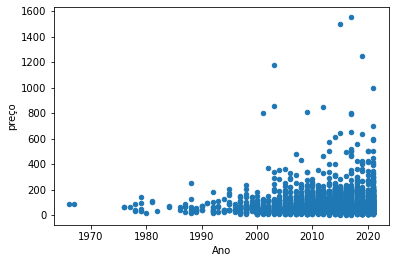

In [398]:
df.plot.scatter("Ano","preço")

<AxesSubplot:>

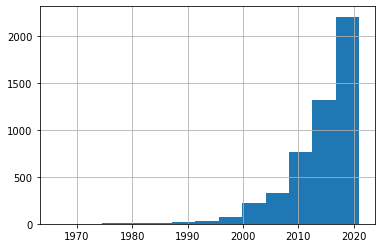

In [399]:
df["Ano"].hist(bins=k)

## Ano parece ser relevante para o preço. Qual a melhor alternativa para tratar anos nulos?

### Setando para valores 0

<AxesSubplot:xlabel='Ano', ylabel='preço'>

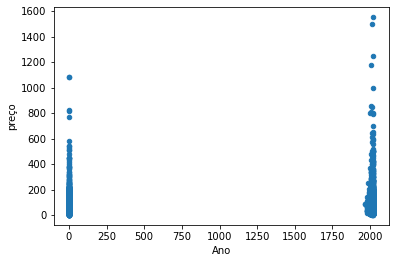

In [400]:
df1 = df.copy()
df1["Ano"] = df1["Ano"].fillna(0)
df1.plot.scatter("Ano","preço")

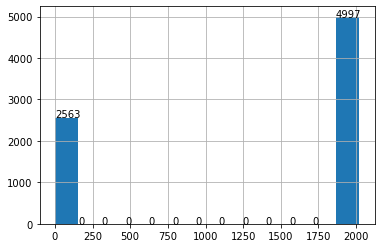

In [401]:
test = df1["Ano"].hist(bins=k)
for i in test.patches:
    plt.text(i.xy[0],i._y1,f'{i._y1:.0f}')
plt.show()

### Setando para média

Ano médio 2014


<AxesSubplot:xlabel='Ano', ylabel='preço'>

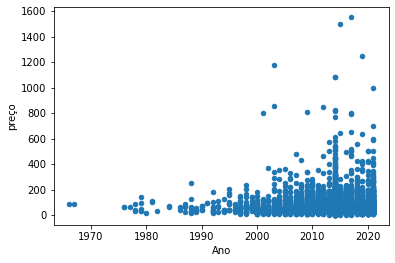

In [402]:
df2 = df.copy()
df2["Ano"] = df2["Ano"].fillna(int(df2["Ano"].mean()))
print(f"Ano médio {df2['Ano'].mean():.0f}")
df2.plot.scatter("Ano","preço")

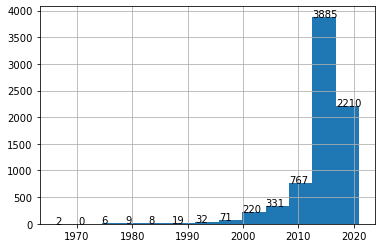

In [403]:
test = df2["Ano"].hist(bins=k)
for i in test.patches:
    plt.text(i.xy[0],i._y1,f'{i._y1:.0f}')
plt.show()

### E se tentar usar o ano médio da editora?

<AxesSubplot:xlabel='Ano', ylabel='preço'>

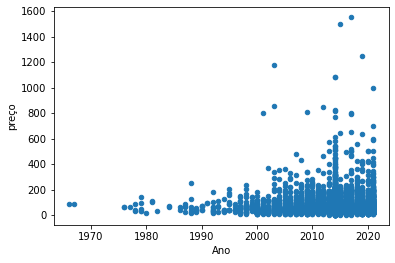

In [404]:
df3 = df.copy()
ano_edicao_media_editora = df3.groupby(by="Editora")["Ano"].mean()
media = int(df3["Ano"].mean())
ano_edicao_media_editora = ano_edicao_media_editora.fillna(media)
ano_edicao_media_editora = ano_edicao_media_editora.astype(int)
for index,row in df3.iterrows():
    if np.isnan(df3.loc[index,"Ano"]):
        if df3.loc[index,"Editora"] in ano_edicao_media_editora:
            # print(f"1-Vai trocar {df3.loc[index,'Ano']} por {ano_edicao_media_editora[df3.loc[index,'Editora']]}")
            df3.loc[index,"Ano"] = ano_edicao_media_editora[df3.loc[index,"Editora"]]
        else:
            # print(f"2-Vai trocar {df3.loc[index,'Ano']} por {media}")
            df3.loc[index,"Ano"] = media
df3.plot.scatter("Ano","preço")

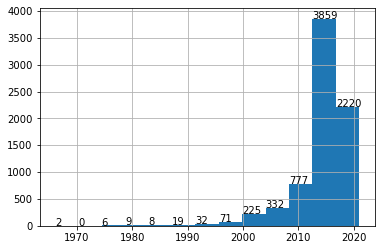

In [405]:
test = df3["Ano"].hist(bins=k)
for i in test.patches:
    plt.text(i.xy[0],i._y1,f'{i._y1:.0f}')
plt.show()

## Utilizar a média por editora parece se aproximar mais (mesmo que por pouco) do original


In [406]:
df = df3
df['Ano'] = df['Ano'].astype(int)

## Parecem haver muitras editoras, quais são as principais:

In [407]:
top10_editoras = df['Editora'].value_counts()[0:10]
top10_editoras

COMPANHIA DAS LETRAS    167
MADRAS                  142
SEXTANTE                115
ALTA BOOKS -            102
VOZES                   100
CONTEXTO                 99
SARAIVA EDITORA -        91
ROCCO -                  90
RECORD                   69
INTRINSECA               68
Name: Editora, dtype: int64

In [408]:
total_editoras = df[df['Editora'].isna()].shape[0]
print(f"{(total_editoras*100)/df.shape[0]:.2f}% ({total_editoras}/{df.shape[0]}) são não nulas")

33.19% (2509/7560) são não nulas


In [409]:
qtd = len(df[df["Editora"].isin(list(top10_editoras.keys()))])
percentual = ((qtd * 100) / total_editoras)
print(f"As principais editoras publicaram {percentual:.2f}%({qtd}/{total_editoras})")

As principais editoras publicaram 41.57%(1043/2509)


In [410]:
df['Editora'] = df['Editora'].fillna("Outra")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Colaborador   5077 non-null   object 
 1   Editora       7560 non-null   object 
 2   ISBN          7228 non-null   object 
 3   Ano           7560 non-null   int64  
 4   Edição        7560 non-null   int64  
 5   Origem        5075 non-null   object 
 6   Formato       5036 non-null   object 
 7   Encadernação  7196 non-null   object 
 8   Idioma        6291 non-null   object 
 9   País          4974 non-null   object 
 10  Páginas       7053 non-null   float64
 11  preço         7560 non-null   float64
 12  nome          7560 non-null   object 
 13  categoria     7560 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 827.0+ KB


## Tratando idiomas e paises nulos

In [411]:
df["País"] = df['País'].str.upper()
df["Idioma"] = df['Idioma'].str.upper()
print(f"Qtd. Paises únicos: {df['País'].nunique()}")
print(f"Qtd. Idiomas únicos: {df['Idioma'].nunique()}")
df[["País",'Idioma']].drop_duplicates()

Qtd. Paises únicos: 11
Qtd. Idiomas únicos: 10


,País,Idioma
0,BRASIL,PORTUGUÊS
9,BRASIL,NaN
13,NaN,PORTUGUÊS
31,NaN,INGLÊS
57,ESTADOS UNIDOS,INGLÊS
68,ESTADOS UNIDOS,NaN
122,NaN,NaN
213,PORTUGAL,PORT. PORTUGAL
221,FRANÇA,NaN
223,ESTADOS UNIDOS,ING


In [412]:
df[["País",'Idioma']].drop_duplicates().dropna()

,País,Idioma
0,BRASIL,PORTUGUÊS
57,ESTADOS UNIDOS,INGLÊS
213,PORTUGAL,PORT. PORTUGAL
223,ESTADOS UNIDOS,ING
226,FRANÇA,PORTUGUÊS
233,INGLATERRA,INGLÊS
474,ESPANHA,ESPANHOL
486,BRASIL,SPA
500,FRANÇA,FRANCÊS
739,BRASIL,ITALIANO


In [413]:
idiomas_por_pais = df.groupby(by=['País','Idioma']).size().reset_index(name='counts')
idiomas_por_pais

,País,Idioma,counts
0,ALEMANHA,ALEMÃO,1
1,ALEMANHA,INGLÊS,6
2,ALEMANHA,PORTUGUÊS,3
3,BRASIL,ESPANHOL,2
4,BRASIL,INGLÊS,22
5,BRASIL,ITALIANO,3
6,BRASIL,JAPONÊS,1
7,BRASIL,PORT. PORTUGAL,1
8,BRASIL,PORTUGUÊS,3835
9,BRASIL,SPA,4


### Será inferido o Idioma com base no País

In [414]:
melhor_idioma_por_pais = {}
for pais in idiomas_por_pais['País'].drop_duplicates():
    df1 = idiomas_por_pais[idiomas_por_pais['País'] == pais]
    melhor = idiomas_por_pais[idiomas_por_pais['País'] == pais]['counts'].max()
    melhor_idioma_por_pais[pais] = df1[df1['counts'] == melhor]['Idioma'].item()
melhor_idioma_por_pais

{'ALEMANHA': 'INGLÊS',
 'BRASIL': 'PORTUGUÊS',
 'ESPANHA': 'ESPANHOL',
 'ESTADOS UNIDOS': 'INGLÊS',
 'FRANÇA': 'FRANCÊS',
 'INGLATERRA': 'INGLÊS',
 'ITALIA': 'ITALIANO',
 'MEXICO': 'PORTUGUÊS',
 'PORTUGAL': 'PORT. PORTUGAL'}

In [415]:
print( df[df['Idioma'].isna()].shape[0])
for i,row in df[df['Idioma'].isna() & df['País'].notna()].iterrows():
    if row['País'] in melhor_idioma_por_pais:
        df.loc[i,'Idioma'] = melhor_idioma_por_pais[row['País']]
print( df[df['Idioma'].isna()].shape[0])

1269
317


### Será inferido País por Idioma

In [416]:
pais_por_idiomas = df.groupby(by=['Idioma','País']).size().reset_index(name='counts')
pais_por_idiomas

,Idioma,País,counts
0,ALEMÃO,ALEMANHA,1
1,ALEMÃO,ESTADOS UNIDOS,1
2,ESPANHOL,BRASIL,2
3,ESPANHOL,ESPANHA,42
4,FRANCÊS,FRANÇA,11
5,ING,ESTADOS UNIDOS,3
6,INGLÊS,ALEMANHA,12
7,INGLÊS,BRASIL,22
8,INGLÊS,ESPANHA,1
9,INGLÊS,ESTADOS UNIDOS,84


In [417]:
melhor_pais_por_idioma = {}
for pais in pais_por_idiomas['Idioma'].drop_duplicates():
    df1 = pais_por_idiomas[pais_por_idiomas['Idioma'] == pais]
    melhor = pais_por_idiomas[pais_por_idiomas['Idioma'] == pais]['counts'].max()
    if df1[df1['counts'] == melhor]['País'].shape[0] == 1:
        nome_pais = df1[df1['counts'] == melhor]['País'].item()
    else:
        nome_pais = df1[df1['counts'] == melhor]['País'][0]
    melhor_pais_por_idioma[pais] = nome_pais
melhor_pais_por_idioma

{'ALEMÃO': 'ALEMANHA',
 'ESPANHOL': 'ESPANHA',
 'FRANCÊS': 'FRANÇA',
 'ING': 'ESTADOS UNIDOS',
 'INGLÊS': 'ESTADOS UNIDOS',
 'ITALIANO': 'BRASIL',
 'JAPONÊS': 'BRASIL',
 'PORT. PORTUGAL': 'PORTUGAL',
 'PORTUGUÊS': 'BRASIL',
 'SPA': 'BRASIL'}

In [418]:
print(df[df['País'].isna()].shape[0])
for i,row in df[df['País'].isna() & df['Idioma'].notna()].iterrows():
    if row['Idioma'] in melhor_pais_por_idioma:
        df.loc[i,'País'] = melhor_pais_por_idioma[row['Idioma']]
print( df[df['País'].isna()].shape[0])

2586
313


### Como ficou o resultado?

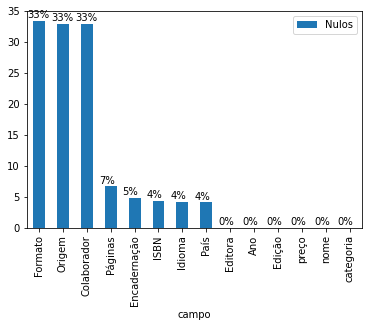

In [419]:
total = df.shape[0]
data = pd.DataFrame({},columns=["campo","Não nulos","Nulos"])
for i,campo in enumerate(df) :
    qtd_null = df[df[campo].isna()].shape[0]
    row = [campo,100,(qtd_null*100)/total]
    data.loc[i] = row

data = data.sort_values(by="Nulos",ascending=False)

g = data.plot.bar(x='campo',y='Nulos')
for index,value in enumerate(data['Nulos']):
    plt.text(index-0.5,value+0.5,f"{value:.0f}%")
plt.show()

In [420]:
df['País'] = df['País'].fillna('Outro')
df['Idioma'] = df['Idioma'].fillna('Outro')

# Quais são os extremos?

In [421]:
df[df["preço"] == df["preço"].min()]

,Colaborador,Editora,ISBN,Ano,Edição,Origem,Formato,Encadernação,Idioma,País,Páginas,preço,nome,categoria
2262,"Autor:WHITE, ELLEN G.",CPB -,8534514089,2013,1,Usado,LIVRO DIDÁTICO,BROCHURA,PORTUGUÊS,BRASIL,106.0,1.55,"GRANDE ESPERANÇA, A",Didáticos


In [422]:
df[df["preço"] == df["preço"].max()]

,Colaborador,Editora,ISBN,Ano,Edição,Origem,Formato,Encadernação,Idioma,País,Páginas,preço,nome,categoria
3739,"Autor:LEITE, CLAUDIA DA COSTA|Autor:ROCHA, MAN...",MANOLE,8520451446,2017,1,Nacional,LIVRO,CAPA DURA,PORTUGUÊS,BRASIL,3586.0,1551.0,TRATADO DE RADIOLOGIA (KIT),Medicina


# Verificando nova proporção de nulos

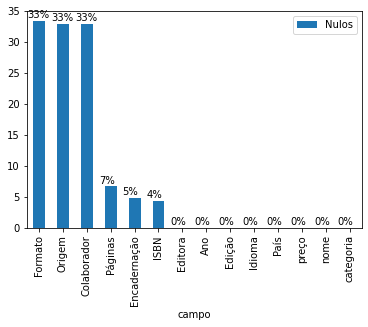

In [423]:
total = df.shape[0]
data = pd.DataFrame({},columns=["campo","Não nulos","Nulos"])
for i,campo in enumerate(df) :
    qtd_null = df[df[campo].isna()].shape[0]
    row = [campo,100,(qtd_null*100)/total]
    data.loc[i] = row

data = data.sort_values(by="Nulos",ascending=False)

g = data.plot.bar(x='campo',y='Nulos')
for index,value in enumerate(data['Nulos']):
    plt.text(index-0.5,value+0.5,f"{value:.0f}%")
plt.show()